Optimization of vaccination with a network model

In [1]:
## Packages
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import seaborn as sns

Network generation:

In [9]:
from network_generation import *

N = 1000    # number of nodes

#G = small_world(N)
#G = scale_free(N)
G = config_model(N)


In [3]:
G = nx.read_gml("datasets\power.gml")

N = G.number_of_nodes()
print(N)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\wemaerem\AppData\Roaming\Python\Python39\site-packages\networkx\readwrite\gml.py", line 446, in pop_attr
    return dct.pop(attr)
KeyError: 'label'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\wemaerem\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\wemaerem\AppData\Local\Temp\ipykernel_5432\2283783993.py", line 1, in <cell line: 1>
    G = nx.read_gml("datasets\power.gml")
  File "C:\Users\wemaerem\AppData\Roaming\Python\Python39\site-packages\networkx\utils\decorators.py", line 816, in func
    return argmap._lazy_compile(__wrapper)(*args, **kwargs)
  File "<class 'networkx.utils.decorators.argmap'> compilation 13", line 5, in argmap_read_gml_9
  File "C:\Users\wemaerem\AppData\Roaming\Python\Python39\site-packages\networkx\readwri

C:\Users\wemaerem\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


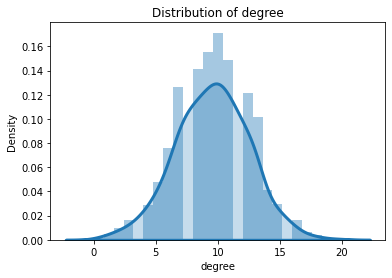

In [7]:
degree_sequence = [val for (node, val) in G.degree()]
np.unique(degree_sequence, return_counts=True)
sns.distplot(degree_sequence, hist = True, kde = True,
                kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Distribution of degree')
plt.xlabel('degree')
plt.ylabel('Density')
plt.show()

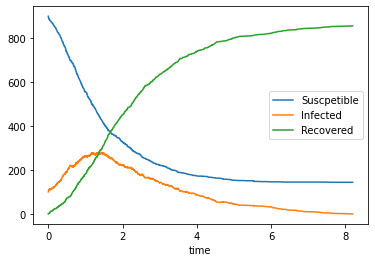

In [11]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt


initial_size = 100
gamma = 1.
tau = 0.3
t, S, I, R = EoN.fast_SIR(G, tau, gamma,
                            initial_infecteds = range(initial_size))

plt.plot(t,S, label = 'Suscpetible')
plt.plot(t, I,  label = 'Infected')
plt.plot(t,R, label='Recovered')
plt.xlabel('time')
plt.legend()
plt.show()


Vaccination
    -Node suppression

In [4]:
## Vaccination 
from Vaccination_select import *

psi = 0.3   #proportion of node vaccinated
M = int(N*psi)   #Number of vaccinated node

vaccinated = centrality_max_recomp(G,M)

G_i=G.copy()
G_i.remove_nodes_from(vaccinated)

100%|██████████| 300/300 [00:24<00:00, 12.49it/s]


In [8]:
from vulnerability_meas_nx import max_ev

print(max_ev(G_i))

8.757254974230019


\\home\wemaerem$\graph_immunization\vulnerability_meas_nx.py:40: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [7]:
## Vaccination 
#from Vaccination_select import *
from GA import GA
psi = 0.3   #proportion of node vaccinated
M = int(N*psi)   #Number of vaccinated node

vaccinated,l_n,l_vuln =GA(G,M,N, measure ='simu_mes', trace =False, f_eps=0.001, n_gene=100)


G_i=G.copy()
G_i.remove_nodes_from(vaccinated)


100%|██████████| 100/100 [04:36<00:00,  2.76s/it]

0.7645714285714286


In [10]:
from netshield import netshield,netshield_plus
print(N)
psi = 0.3   #proportion of node vaccinated
M = int(N*psi)   #Number of vaccinated node

vaccinated = netshield_plus(G,M,300)

G_i=G.copy()
G_i.remove_nodes_from(vaccinated)

22963


  0%|          | 0/22 [00:04<?, ?it/s]


KeyboardInterrupt: 

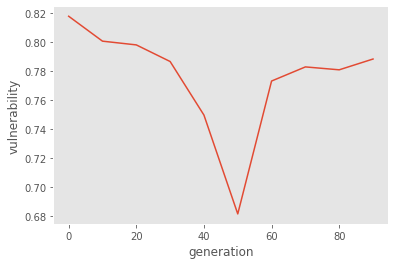

In [9]:
## Evolution of the vulnerability

plt.figure(1)
plt.plot(l_n,l_vuln)
plt.grid()
plt.ylabel('vulnerability')
plt.xlabel('generation')
plt.show()

In [4]:
# save the graph
from graph_viz import *

G2=G.copy()

nx.set_node_attributes(G2, dict((el,1) for el in vaccinated),"vacc")

save_graph(G2,'scalefree_ex2')

Simulation    
    -SIR model
    

In [5]:
## Parameter setting 

n_inf = 10   # initial number of infected nodes

gamma = 1
tau = 0.3


efficiency: 0.432


C:\Users\wemaerem\AppData\Local\Temp\ipykernel_8108\1022795897.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected = rd.sample(G_i.nodes,n_inf)


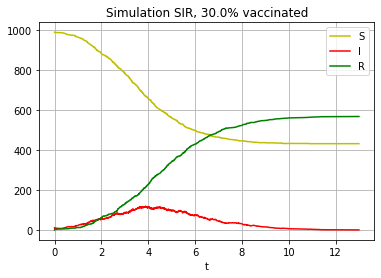

In [11]:
## Simulation

# infected nodes list

infected = rd.sample(G_i.nodes,n_inf)


t, S, I, R = EoN.fast_SIR(G_i, tau, gamma,
                            initial_infecteds = infected)

plt.figure(2)
plt.plot(t,S+M,'y',label='S')
plt.plot(t,I,'r',label='I')
plt.plot(t,R,'g',label='R')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.title('Simulation SIR, '+str(psi*100)+'% vaccinated')

print("efficiency: {}".format((S[-1]+M)/N))


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

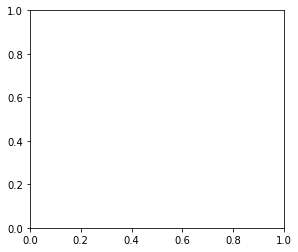

In [8]:
## Animation of the Contagion

## To build
pos = {node:node for node in G}
sim_kwargs = {'pos': pos}
sim = EoN.fast_SIR(G_i, tau, gamma,
                            initial_infecteds = infected, tmax = 40,
                            return_full_data=True, sim_kwargs = sim_kwargs)



ani=sim.animate(ts_plots=['I', 'SIR'], node_size = 4)
ani.save('SIR_2dgrid.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
